In [3]:
import numpy as np
import pandas as pd

data={"Marks":[45,np.nan,60,np.nan]}
df = pd.DataFrame(data)

print(df)
print("*****printing True for Missing values*****")

print(df.isnull())

print(df.isnull().sum())


   Marks
0   45.0
1    NaN
2   60.0
3    NaN
*****printing True for Missing values*****
   Marks
0  False
1   True
2  False
3   True
Marks    2
dtype: int64


In [2]:
import numpy as np
import pandas as pd
data ={
    'Roll No.' : [101,102,103,104],
    'Name':['Anu',"Raj",None,"Meena"],
    'Mark':[45,np.nan,60,55],
}

df=pd.DataFrame(data)
print(df)

print(df.dropna())

   Roll No.   Name  Mark
0       101    Anu  45.0
1       102    Raj   NaN
2       103   None  60.0
3       104  Meena  55.0
   Roll No.   Name  Mark
0       101    Anu  45.0
3       104  Meena  55.0


In [6]:
import numpy as np
import pandas as pd
data ={
    'Roll No.' : [101,102,103,104],
    'Name':['Anu',"Raj",None,"Meena"],
    'Mark':[45,-1,60,55],
    'Mark1':[45,-1,60,np.nan],
    'Mark2':[np.nan,-1,60,55],
    'Mark':[45,-1,60,np.nan],
    'Result':["Pass",'Fail','Pass','Pass']
}
df=pd.DataFrame(data)

df['Mark']=df['Mark'].replace(-1,np.nan)
df.replace({'Result':{'Pass':1,'Fail':0}},inplace=True)
print(df)

   Roll No.   Name  Mark  Result
0       101    Anu  45.0       1
1       102    Raj   NaN       0
2       103   None  60.0       1
3       104  Meena  55.0       1


In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv("Movies.csv")

highest_rated = df.loc[df["Rating"].idxmax()] 
print("Highest Rated Movie:") 
print(highest_rated)

Highest Rated Movie:
Movie Name    Mission Impossible
Language                 English
Genre                     Action
Rating                       9.0
Review                      Best
Name: 6, dtype: object


In [10]:
hindi_movies = df[df["Language"] == "Hindi"] 
hindi_movies.to_csv("HindiMovies.csv", index=False)

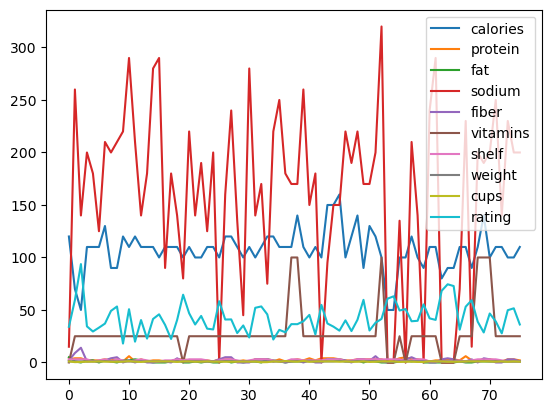

Five-number summary before preprocessing:
     calories  protein  fat  sodium  fiber  vitamins  shelf  weight  cups  \
min      50.0      1.0  0.0     0.0   0.00       0.0    1.0     0.5  0.25   
25%     100.0      2.0  0.0   132.5   0.75      25.0    1.0     1.0  0.67   
50%     110.0      2.5  1.0   180.0   1.75      25.0    2.0     1.0  0.75   
75%     110.0      3.0  2.0   212.5   3.00      25.0    3.0     1.0  1.00   
max     160.0      6.0  5.0   320.0  14.00     100.0    3.0     1.5  1.50   

        rating  
min  18.042851  
25%  32.932466  
50%  40.253086  
75%  50.780847  
max  93.704912  
     calories  protein  fat  sodium  fiber  vitamins  shelf  weight  cups  \
min      50.0      1.0  0.0     0.0   0.00       0.0    1.0     0.5  0.25   
25%     100.0      2.0  0.0   132.5   0.75      25.0    1.0     1.0  0.67   
50%     110.0      2.5  1.0   180.0   1.75      25.0    2.0     1.0  0.75   
75%     110.0      3.0  2.0   212.5   3.00      25.0    3.0     1.0  1.00   
max     

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("cereals.csv")
df.plot()
plt.show()
numeric_cols = df.columns[df.dtypes != 'object']
# Five-number summary: min, Q1, median, Q3, max
summary_before = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min','25%','50%','75%','max']]
print("Five-number summary before preprocessing:")
print(summary_before)
df[numeric_cols] = df[numeric_cols].replace(-1, np.nan)

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
print(summary_before)
summary_after_missing = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min','25%','50%','75%','max']]
print("Five-number summary after treating missing values:")
print(summary_after_missing)
def treat_noisy_with_median(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = series.median()
    return series.apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

df[numeric_cols] = df[numeric_cols].apply(treat_noisy_with_median)
summary_after_noisy = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min','25%','50%','75%','max']]
print("Five-number summary after treating noisy values:")
print(summary_after_noisy)
